In [20]:
# Comparaison des data en entier

In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_john_2024.csv")

In [24]:
df_modified = df[(df['Points:2']==0.)
                 & (df['Time']>6.5)
                 & (df['Points:0']>0.02)
                 & (df['Points:0']<0.2)
                 & (df['Points:1']>-0.1)
                 & (df['Points:1']<0.1)
                 ]

In [25]:
x_full, y_full, t_full = (
        np.array(df_modified["Points:0"]),
        np.array(df_modified["Points:1"]),
        np.array(df_modified["Time"]),
)
u_full, v_full, p_full = (
    np.array(df_modified["Velocity:0"]),
    np.array(df_modified["Velocity:1"]),
    np.array(df_modified["Pressure"]),
)

In [102]:
x_norm_full = (x_full - x_full.mean()) / x_full.std()

y_norm_full = (y_full - y_full.mean()) / y_full.std()
t_norm_full = (t_full - t_full.mean()) / t_full.std()
p_norm_full = (p_full - p_full.mean()) / p_full.std()
u_norm_full = (u_full - u_full.mean()) / u_full.std()
v_norm_full = (v_full - v_full.mean()) / v_full.std()

X_full = np.array([x_norm_full, y_norm_full, t_norm_full], dtype=np.float32).T
U_full = np.array([u_norm_full, v_norm_full, p_norm_full], dtype=np.float32).T


In [104]:

x_int = (x_norm_full.max()-x_norm_full.min())/6
y_int = (y_norm_full.max()-y_norm_full.min())/6
X_train = np.zeros((0, 3))
U_train = np.zeros((0, 3))
for time in np.unique(t_norm_full):
    for x_num in range(6):
        for y_num in range(6):
            masque = (
                (x_norm_full > x_norm_full.min()+x_int*x_num)
                & (x_norm_full < x_norm_full.min()+(x_num+1)*x_int)
                & (y_norm_full < y_norm_full.min()+(y_num+1)*y_int)
                & (y_norm_full > y_norm_full.min()+(y_num)*y_int)
                & (t_norm_full == time)
            )
            print(x_num, y_num, x_int, y_int, time)
            indice = np.random.choice(np.arange(len(x_norm_full[masque])), size=1, replace=False)
            new_x=np.array(
                [
                    x_norm_full[masque][indice],
                    y_norm_full[masque][indice],
                    t_norm_full[masque][indice]
                    
                ]
                ).reshape(-1,3)
            new_y = np.array(
                [
                    u_norm_full[masque][indice],
                    v_norm_full[masque][indice],
                    p_norm_full[masque][indice]
                    
                ]
                ).reshape(-1,3)
            X_train = np.concatenate((X_train, new_x))
            U_train = np.concatenate((X_train, new_y))

0 0 0.598545681556411 0.7949515240943859 -1.718079659610281
0 1 0.598545681556411 0.7949515240943859 -1.718079659610281
0 2 0.598545681556411 0.7949515240943859 -1.718079659610281
0 3 0.598545681556411 0.7949515240943859 -1.718079659610281
0 4 0.598545681556411 0.7949515240943859 -1.718079659610281
0 5 0.598545681556411 0.7949515240943859 -1.718079659610281
1 0 0.598545681556411 0.7949515240943859 -1.718079659610281
1 1 0.598545681556411 0.7949515240943859 -1.718079659610281
1 2 0.598545681556411 0.7949515240943859 -1.718079659610281
1 3 0.598545681556411 0.7949515240943859 -1.718079659610281
1 4 0.598545681556411 0.7949515240943859 -1.718079659610281
1 5 0.598545681556411 0.7949515240943859 -1.718079659610281
2 0 0.598545681556411 0.7949515240943859 -1.718079659610281
2 1 0.598545681556411 0.7949515240943859 -1.718079659610281
2 2 0.598545681556411 0.7949515240943859 -1.718079659610281
2 3 0.598545681556411 0.7949515240943859 -1.718079659610281
2 4 0.598545681556411 0.7949515240943859

KeyboardInterrupt: 

In [97]:
masque_time = t_norm_full == t_norm_full[0]

In [100]:
x_norm_full[masque_time]

array([-0.4216536 , -0.4216536 , -1.119366  , ..., -0.51734028,
       -0.56724663, -0.61844361])

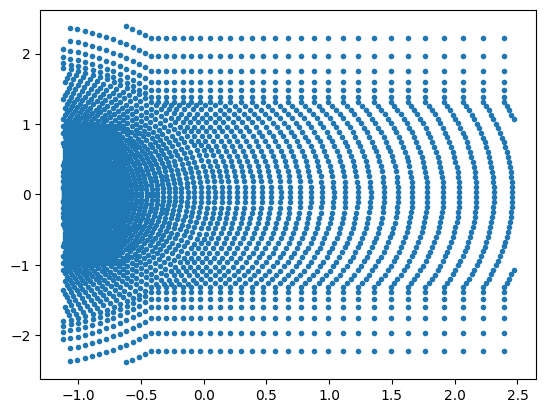

In [101]:
plt.scatter(x_norm_full[masque_time], y_norm_full[masque_time], marker='.')

In [29]:
x_full.shape

(382038,)

In [26]:
np.unique(t_full).shape

(123,)

In [30]:
X_full = np.array([x_full, y_full, t_full], dtype=np.float32).T
U_full = np.array([u_full, v_full, p_full], dtype=np.float32).T

In [80]:
X_train = np.zeros((0, 3))
U_train = np.zeros((0, 3))

In [81]:
x_int = (x_full.max()-x_full.min())/6
y_int = (y_full.max()-y_full.min())/6


for time in np.unique(t_full):
    for x_num in range(6):
        for y_num in range(6):
            masque = (
                (x_full > x_full.min()+x_int*x_num)
                & (x_full < x_full.min()+(x_num+1)*x_int)
                & (y_full < y_full.min()+(y_num+1)*y_int)
                & (y_full > y_full.min()+(y_num)*y_int)
                & (t_full == time)
            )
            indice = np.random.choice(np.arange(len(x_full[masque])), size=1, replace=False)
            new_x=np.array(
                [
                    x_full[masque][indice],
                    y_full[masque][indice],
                    t_full[masque][indice]
                    
                ]
                ).reshape(-1,3)
            new_y = np.array(
                [
                    u_full[masque][indice],
                    v_full[masque][indice],
                    p_full[masque][indice]
                    
                ]
                ).reshape(-1,3)
            X_train = np.concatenate((X_train, new_x))
            U_train = np.concatenate((X_train, new_y))


In [82]:
X_train = np.concatenate((X_train, new_x))

In [83]:
X_train = np.concatenate((X_train, a))

In [84]:
X_train

array([[ 0.0200349, -0.0858607,  6.50405  ],
       [ 0.0398855, -0.0509101,  6.50405  ],
       [ 0.0233106, -0.0154065,  6.50405  ],
       ...,
       [ 0.195613 ,  0.0817666,  7.99999  ],
       [ 0.195613 ,  0.0817666,  7.99999  ],
       [ 0.0216736,  0.0131021,  6.50405  ]])

In [85]:
masque = t_full == 6.50405

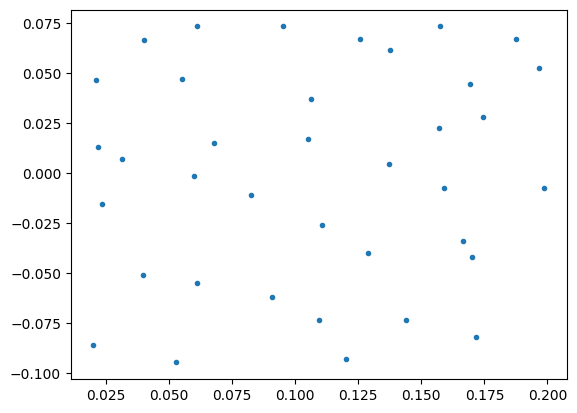

In [86]:
masque = X_train[:,2] == 6.50405
plt.scatter(X_train[masque][:,0], X_train[masque][:,1], marker='.')

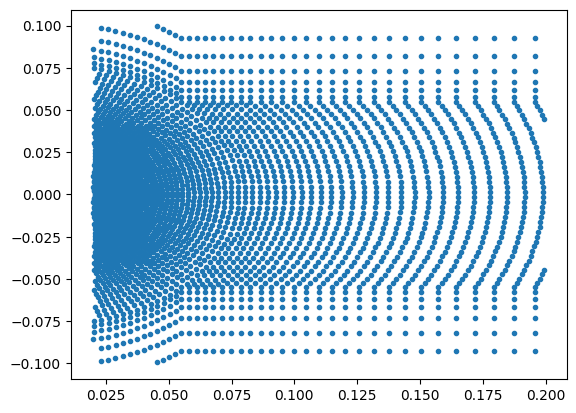

In [72]:
plt.scatter(x_full[masque], y_full[masque], marker='.')

In [22]:
def charge_data_john():
    """
    Charge the data of X_full, U_full with every points
    And X_train, U_train with less points
    """
    # La data
    # On adimensionne la data
    df = pd.read_csv("data.csv")
    print('yeahhh')
    df_modified = df[
          (df["Points:0"] >= 0.02)
        & (df["Points:0"] <= 0.2)
        & (df["Points:1"] >= -0.1)
        & (df["Points:1"] <= 0.1)
        & (df["Time"] > 6)
        & (df["Time"] < 8)
    ]
    # df_modified = df
    # Uniquement la fin de la turbulence
    print(1)
    x_full, y_full, t_full = (
        np.array(df_modified["Points:0"]),
        np.array(df_modified["Points:1"]),
        np.array(df_modified["Time"]),
    )
    u_full, v_full, p_full = (
        np.array(df_modified["Velocity:0"]),
        np.array(df_modified["Velocity:1"]),
        np.array(df_modified["Pressure"]),
    )

    x_norm_full = (x_full - x_full.mean()) / x_full.std()
    y_norm_full = (y_full - y_full.mean()) / y_full.std()
    t_norm_full = (t_full - t_full.mean()) / t_full.std()
    p_norm_full = (p_full - p_full.mean()) / p_full.std()
    u_norm_full = (u_full - u_full.mean()) / u_full.std()
    v_norm_full = (v_full - v_full.mean()) / v_full.std()
    print(2)
    X_full = np.array([x_norm_full, y_norm_full, t_norm_full], dtype=np.float32).T
    U_full = np.array([u_norm_full, v_norm_full, p_norm_full], dtype=np.float32).T

    x_int = np.linspace(x_norm_full.min(), x_norm_full.max(), 8)
    y_int = np.linspace(y_norm_full.min(), y_norm_full.max(), 8)
    X_train = np.zeros((0, 3))
    U_train = np.zeros((0, 3))
    print(3)
    for time in np.unique(X_full[:, 2])[:3]:
        for x_ in x_int:
            for y_ in y_int:
                masque_time = X_full[:, 2] == time
                distances = np.linalg.norm(
                    X_full[masque_time][:, :2] - np.array([x_, y_], dtype=np.float32),
                    axis=1,
                )
                index_min = np.argmin(distances)
                point_proche = X_full[masque_time][index_min]
                sol_proche = U_full[masque_time][index_min]
                X_train = np.concatenate((X_train, point_proche.reshape(-1, 3)))
                U_train = np.concatenate((U_train, sol_proche.reshape(-1, 3)))

    mean_std = {
        "u_mean": u_full.mean(),
        "v_mean": v_full.mean(),
        "p_mean": p_full.mean(),
        "x_mean": x_full.mean(),
        "y_mean": y_full.mean(),
        "t_mean": t_full.mean(),
        "x_std": x_full.std(),
        "y_std": y_full.std(),
        "t_std": t_full.std(),
        "u_std": u_full.std(),
        "v_std": v_full.std(),
        "p_std": p_full.std(),
    }

    return X_train, U_train, X_full, U_full, mean_std

In [36]:
def charge_data_john():
    """
    Charge the data of X_full, U_full with every points
    And X_train, U_train with less points
    """
    # La data
    # On adimensionne la data
    df = pd.read_csv("data_john_2024.csv")
    df_modified = df[
          (df["Points:0"] >= 0.02)
        & (df["Points:0"] <= 0.2)
        & (df["Points:1"] >= -0.1)
        & (df["Points:1"] <= 0.1)
        & (df["Time"] > 6)
        & (df["Time"] < 8)
        & (df["Points:2"] == 0.)
    ]
    # df_modified = df
    # Uniquement la fin de la turbulence
    print(1)
    x_full, y_full, t_full = (
        np.array(df_modified["Points:0"]),
        np.array(df_modified["Points:1"]),
        np.array(df_modified["Time"]),
    )
    u_full, v_full, p_full = (
        np.array(df_modified["Velocity:0"]),
        np.array(df_modified["Velocity:1"]),
        np.array(df_modified["Pressure"]),
    )

    x_norm_full = (x_full - x_full.mean()) / x_full.std()
    y_norm_full = (y_full - y_full.mean()) / y_full.std()
    t_norm_full = (t_full - t_full.mean()) / t_full.std()
    p_norm_full = (p_full - p_full.mean()) / p_full.std()
    u_norm_full = (u_full - u_full.mean()) / u_full.std()
    v_norm_full = (v_full - v_full.mean()) / v_full.std()
    print(2)
    X_full = np.array([x_norm_full, y_norm_full, t_norm_full], dtype=np.float32).T
    U_full = np.array([u_norm_full, v_norm_full, p_norm_full], dtype=np.float32).T

    x_int = np.linspace(x_norm_full.min(), x_norm_full.max(), 8)
    y_int = np.linspace(y_norm_full.min(), y_norm_full.max(), 8)
    X_train = np.zeros((0, 3))
    U_train = np.zeros((0, 3))
    print(3)
    for time in np.unique(X_full[:, 2])[:3]:
        for x_ in x_int:
            for y_ in y_int:
                masque_time = X_full[:, 2] == time
                distances = np.linalg.norm(
                    X_full[masque_time][:, :2] - np.array([x_, y_], dtype=np.float32),
                    axis=1,
                )
                index_min = np.argmin(distances)
                point_proche = X_full[masque_time][index_min]
                sol_proche = U_full[masque_time][index_min]
                X_train = np.concatenate((X_train, point_proche.reshape(-1, 3)))
                U_train = np.concatenate((U_train, sol_proche.reshape(-1, 3)))

    mean_std = {
        "u_mean": u_full.mean(),
        "v_mean": v_full.mean(),
        "p_mean": p_full.mean(),
        "x_mean": x_full.mean(),
        "y_mean": y_full.mean(),
        "t_mean": t_full.mean(),
        "x_std": x_full.std(),
        "y_std": y_full.std(),
        "t_std": t_full.std(),
        "u_std": u_full.std(),
        "v_std": v_full.std(),
        "p_std": p_full.std(),
    }

    return X_train, U_train, X_full, U_full, mean_std

In [34]:
def charge_data_pap():
    """
    Charge the data of X_full, U_full with every points
    And X_train, U_train with less points
    """
    mat_data = scipy.io.loadmat("cylinder_Re3900_36points_100snaps.mat")
    data = mat_data["stack"]

    x, y, t = data[:, 0], data[:, 1], data[:, 2]
    x, y = x - x.min(), y - y.min()
    u, v, p = data[:, 3], data[:, 4], data[:, 5]

    x_norm = (x - x.mean()) / x.std()
    y_norm = (y - y.mean()) / y.std()
    t_norm = (t - t.mean()) / t.std()
    p_norm = (p - p.mean()) / p.std()
    u_norm = (u - u.mean()) / u.std()
    v_norm = (v - v.mean()) / v.std()

    X_train = np.array([x_norm, y_norm, t_norm], dtype=np.float32).T

    U_train = np.array([u_norm, v_norm, p_norm], dtype=np.float32).T

    mat_data_full = scipy.io.loadmat("cylinder_data.mat")
    data_full = mat_data_full["stack"]

    x_full, y_full, t_full = data_full[:, 0], data_full[:, 1], data_full[:, 2]
    x_full, y_full = x_full - x_full.min(), y_full - y_full.min()
    u_full, v_full, p_full = data_full[:, 3], data_full[:, 4], data_full[:, 5]

    x_norm_full = (x_full - x_full.mean()) / x_full.std()
    y_norm_full = (y_full - y_full.mean()) / y_full.std()
    t_norm_full = (t_full - t_full.mean()) / t_full.std()
    p_norm_full = (p_full - p_full.mean()) / p_full.std()
    u_norm_full = (u_full - u_full.mean()) / u_full.std()
    v_norm_full = (v_full - v_full.mean()) / v_full.std()

    X_full = np.array([x_norm_full, y_norm_full, t_norm_full], dtype=np.float32).T

    U_full = np.array([u_norm_full, v_norm_full, p_norm_full], dtype=np.float32).T
    # data for pde
    mean_std = {
        "u_mean": u.mean(),
        "v_mean": v.mean(),
        "p_mean": p.mean(),
        "x_mean": x.mean(),
        "y_mean": y.mean(),
        "t_mean": t.mean(),
        "x_std": x.std(),
        "y_std": y.std(),
        "t_std": t.std(),
        "u_std": u.std(),
        "v_std": v.std(),
        "p_std": p.std(),
    }

    return X_train, U_train, X_full, U_full, mean_std

In [37]:
X_train1, U_train1, X_full1, U_full1, mean_std1 = charge_data_john()

1
2
3


In [26]:
X_train3, U_train3, X_full3, U_full3, mean_std3 = charge_old_data_john()

yeahhh
1
2
3


In [27]:
X_train2, U_train2, X_full2, U_full2, mean_std2 = charge_data_pap()

In [38]:
time_1 = np.unique(X_full1[:,2])[::-1]
int_temp_1 = time_1[:-1]- time_1[1:]
int_temp_1.mean()
print(f"En moyenne, on a {int_temp_1.mean():.3e} de pas de temps et l'on a un ecart de {int_temp_1.std():.3e}")

En moyenne, on a 4.277e-02 de pas de temps et l'on a un ecart de 7.892e-06


In [39]:
time2 = np.unique(X_full2[:,2])[::-1]
int_temp2 = time2[:-1]- time2[1:]
int_temp2.mean()
print(f"En moyenne, on a {int_temp2.mean():.3e} de pas de temps et l'on a un ecart de {int_temp2.std():.3e}")

En moyenne, on a 3.464e-02 de pas de temps et l'on a un ecart de 1.135e-07


In [30]:
time_3 = np.unique(X_full3[:,2])[::-1]
int_temp_3 = time_3[:-1]- time_3[1:]
int_temp_3.mean()
print(f"En moyenne, on a {int_temp_3.mean():.3e} de pas de temps et l'on a un ecart de {int_temp_3.std():.3e}")

En moyenne, on a 4.277e-02 de pas de temps et l'on a un ecart de 8.615e-05


In [40]:
X_full3.shape

(503172, 3)

In [41]:
X_full1.shape

(251586, 3)

In [43]:
np.unique(X_full1[:,2])

array([-1.7107984e+00, -1.6680335e+00, -1.6252512e+00, -1.5824863e+00,
       -1.5397214e+00, -1.4969565e+00, -1.4541742e+00, -1.4114093e+00,
       -1.3686444e+00, -1.3258621e+00, -1.2830973e+00, -1.2403324e+00,
       -1.1975501e+00, -1.1547852e+00, -1.1120203e+00, -1.0692554e+00,
       -1.0264730e+00, -9.8370814e-01, -9.4094324e-01, -8.9816093e-01,
       -8.5539603e-01, -8.1263119e-01, -7.6986629e-01, -7.2708398e-01,
       -6.8431908e-01, -6.4155418e-01, -5.9877187e-01, -5.5600703e-01,
       -5.1324213e-01, -4.7047722e-01, -4.2769492e-01, -3.8493001e-01,
       -3.4216514e-01, -2.9938284e-01, -2.5661793e-01, -2.1385305e-01,
       -1.7108816e-01, -1.2830585e-01, -8.5540958e-02, -4.2776074e-02,
        6.2391546e-06,  4.2771127e-02,  8.5536011e-02,  1.2831832e-01,
        1.7108321e-01,  2.1384810e-01,  2.5661299e-01,  2.9939529e-01,
        3.4216020e-01,  3.8492507e-01,  4.2770737e-01,  4.7047228e-01,
        5.1323718e-01,  5.5600202e-01,  5.9878439e-01,  6.4154923e-01,
      

In [16]:
time_2 = np.sort(X_full2[:,2])[::-1]

In [18]:
time_2.max()

1.7148156

In [8]:
int_temps_1 = X_train1[1:,2]-X_train1[:-1,2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0427649 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
print(f"Il y a {X_full1.shape[0]} éléments dans la data de john")
print(f"Il y a {X_full2.shape[0]} éléments dans la data du papier")

Il y a 6927168 éléments dans la data de john
Il y a 4000000 éléments dans la data du papier


In [29]:
print(f"Il y a {np.unique(X_full1[:,2]).shape[0]} pas de temps dans la data de john")
print(f"Il y a {np.unique(X_full2[:,2]).shape[0]} pas de temps dans la data du papier")

Il y a 327 pas de temps dans la data de john
Il y a 100 pas de temps dans la data du papier


In [30]:
df1 = pd.DataFrame(X_full1, columns=['x', 'y', 't'])
grouped1 = df1.groupby('t').count()
df2 = pd.DataFrame(X_full2, columns=['x', 'y', 't'])
grouped2 = df2.groupby('t').count()

print(f"En moyenne il y a {grouped1['x'].mean()} éléments par pas de temps pour John")
print(f"En moyenne il y a {grouped2['x'].mean()} éléments par pas de temps pour le papier")


En moyenne il y a 21184.0 éléments par pas de temps pour John
En moyenne il y a 40000.0 éléments par pas de temps pour le papier


In [31]:
print(f"John : tmax:{X_full1[:,2].max():.3e}, tmin:{X_full1[:,2].min():.3e}")
print(f"John : xmax:{X_full1[:,0].max():.3e}, xmin:{X_full1[:,0].min():.3e}")
print(f"John : ymax:{X_full1[:,1].max():.3e}, ymin:{X_full1[:,1].min():.3e}")
print(f"Papier : tmax:{X_full2[:,2].max():.3e}, tmin:{X_full2[:,2].min():.3e}")
print(f"Papier : xmax:{X_full2[:,0].max():.3e}, xmin:{X_full2[:,0].min():.3e}")
print(f"Papier : ymax:{X_full2[:,1].max():.3e}, ymin:{X_full2[:,1].min():.3e}")

John : tmax:1.726e+00, tmin:-1.727e+00
John : xmax:2.953e+00, xmin:-3.475e+00
John : ymax:3.822e+00, ymin:-3.822e+00
Papier : tmax:1.715e+00, tmin:-1.715e+00
Papier : xmax:1.723e+00, xmin:-1.723e+00
Papier : ymax:1.723e+00, ymin:-1.723e+00


Text(0.5, 1.0, 'John full')

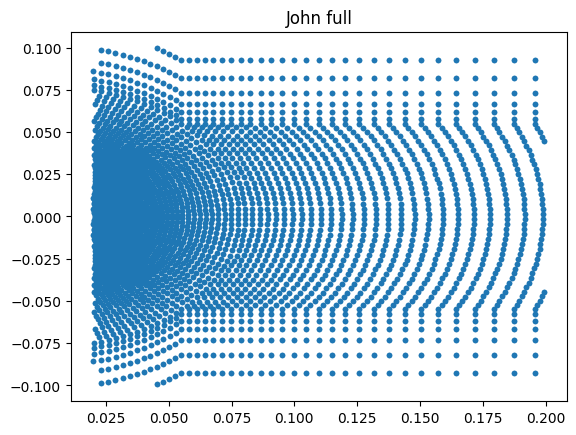

In [14]:
masque1 = X_full1[:,2] == np.unique(X_full1[:,2])[67]
plt.scatter(X_full1[masque1][:,0]*mean_std1['x_std']+mean_std1['x_mean'], X_full1[masque1][:,1]*mean_std1['y_std']+mean_std1['y_mean'], marker='.')
plt.title('John full')

Text(0.5, 1.0, 'John full')

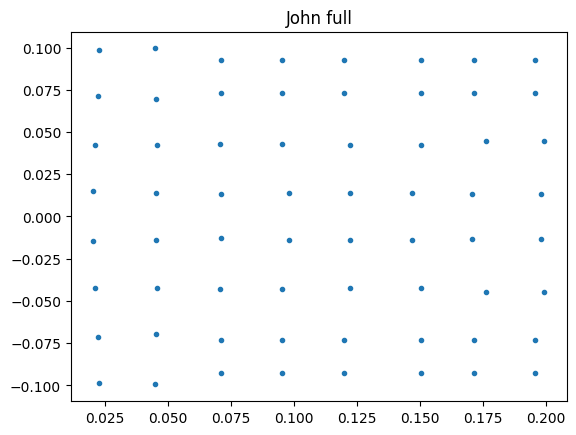

In [16]:
masque3 = X_train1[:,2] == np.unique(X_train1[:,2])[0]
plt.scatter(X_train1[masque3][:,0]*mean_std1['x_std']+mean_std1['x_mean'], X_train1[masque3][:,1]*mean_std1['y_std']+mean_std1['y_mean'], marker='.')
plt.title('John full')

Text(0.5, 1.0, 'Papier full')

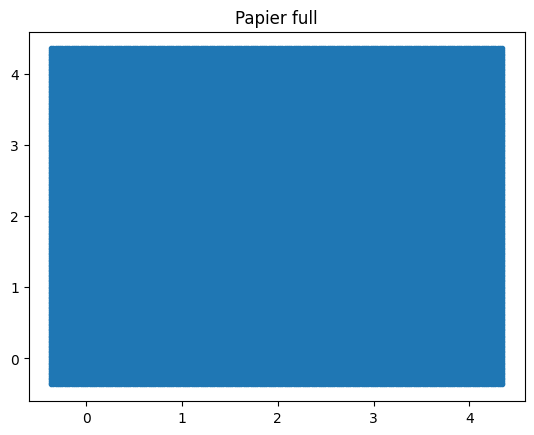

In [16]:
masque2 = X_full2[:,2] == np.unique(X_full2[:,2])[67]
plt.scatter(X_full2[masque2][:,0]*mean_std2['x_std']+mean_std2['x_mean'], X_full2[masque2][:,1]*mean_std2['y_std']+mean_std2['y_mean'], marker='.')
plt.title('Papier full')

Text(0.5, 1.0, 'John Train')

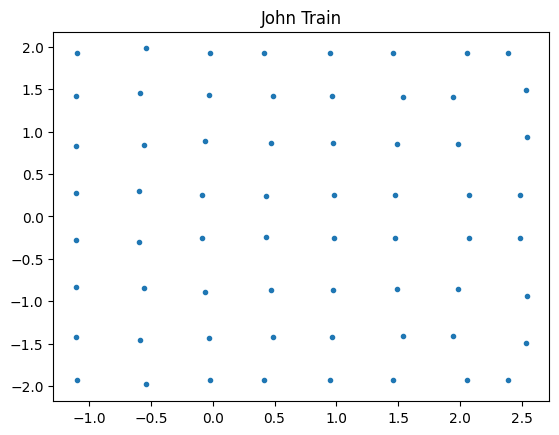

In [62]:
masque1 = X_train1[:,2] == np.unique(X_train1[:,2])[67]
plt.scatter(X_train1[masque1][:,0], X_train1[masque1][:,1], marker='.')
plt.title('John Train')

Text(0.5, 1.0, 'Papier Train')

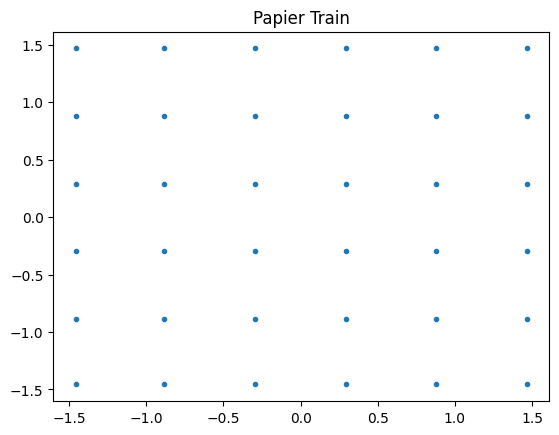

In [53]:
masque2 = X_train2[:,2] == np.unique(X_train2[:,2])[67]
plt.scatter(X_train2[masque2][:,0], X_train2[masque2][:,1], marker='.')
plt.title('Papier Train')